## **Séries Temporais**

1) Dados meteorológicos de Curitiba-PR:

In [1]:
#Importando a biblioteca necessária para trabalhar com o conjunto de dados:

import pandas as pd

In [2]:
#Importando o conjunto de dados:

inmet = pd.read_csv(
    filepath_or_buffer= '/content/dados_ctba.csv',
    sep = ';',
    decimal = ','
)

In [3]:
# Observando a estrutura do conjunto de dados

inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Data Medicao                      3967 non-null   object 
 1   PRECIPITACAO TOTAL                3658 non-null   float64
 2   PRESSAO ATMOSFERICA MEDIA         3755 non-null   float64
 3   TEMPERATURA DO PONTO DE ORVALHO   2187 non-null   float64
 4   TEMPERATURA MEDIA                 3649 non-null   float64
 5   UMIDADE RELATIVA DO AR            3055 non-null   float64
 6   VENTO, VELOCIDADE MEDIA           3754 non-null   float64
dtypes: float64(6), object(1)
memory usage: 217.1+ KB


Nota-se que a data está no formato "object", que não é o formato ideal para se trabalhar com séries temporais. Assim, o próximo passo é converter data para datetime:

In [4]:
#Transformando o atributo data em datetime:

inmet['Data Medicao'] = pd.to_datetime(inmet['Data Medicao'], infer_datetime_format=True)

In [5]:
#Observando o conjunto de dados:

inmet

,Data Medicao,PRECIPITACAO TOTAL,PRESSAO ATMOSFERICA MEDIA,TEMPERATURA DO PONTO DE ORVALHO,TEMPERATURA MEDIA,UMIDADE RELATIVA DO AR,"VENTO, VELOCIDADE MEDIA"
0,2012-01-01,1.8,905.708333,14.633333,18.754167,77.625000,2.175000
1,2012-02-01,1.2,905.366667,13.108333,19.129167,70.666667,1.616667
2,2012-03-01,0.6,908.012500,11.691667,20.737500,61.208333,2.283333
3,2012-04-01,0.4,910.137500,11.900000,21.420833,59.541667,2.158333
4,2012-05-01,0.2,911.220833,13.750000,19.745833,69.458333,2.616667
...,...,...,...,...,...,...,...
3962,2022-06-11,NaN,916.285000,9.330000,NaN,75.050000,2.195000
3963,2022-07-11,0.0,915.147826,9.069565,14.073913,73.826087,2.026087
3964,2022-08-11,0.0,913.378261,9.121739,15.273913,70.086957,1.886957
3965,2022-09-11,0.0,911.679167,10.654167,17.183333,70.541667,2.429167


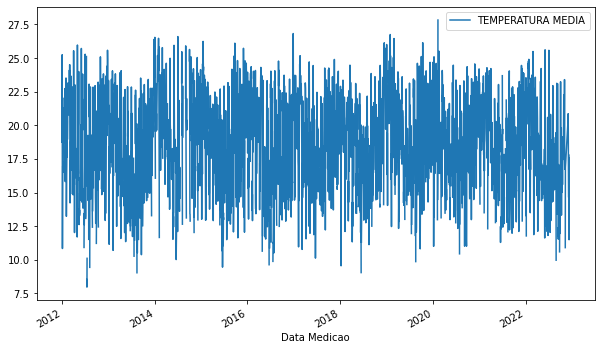

In [6]:
#Visualização da série temporal:

inmet.plot.line(x='Data Medicao',y='TEMPERATURA MEDIA',figsize = (10,6));

Os valores da temperatura média para Curitiba oscilam entre 7,5 °C e 27,5°C. Além disso, a temperatura permanece em torno de um valor fixo.

# 2) Taxa de Homicídios no Brasil:

In [7]:
# Importando o conjunto de dados:

hd = pd.read_csv(
    filepath_or_buffer= 'https://raw.githubusercontent.com/jonates/opendata/master/homicidios_dolosos/homicidios_dolosos.csv',
    sep = ';',
    decimal = ','
)


In [8]:
# Visualização do conjunto de dados:

hd

,sigla_uf,nome_regiao,codigo_regiao,nome_uf,codigo_uf,latitude,longitude,ano,homicidios,tx_homicidios
0,AC,Norte,1,Acre,12,-8.77,-70.55,2012,177,23.3
1,AL,Nordeste,2,Alagoas,27,-9.62,-36.82,2012,2040,64.4
2,AM,Norte,1,Amazonas,13,-3.47,-65.10,2012,1086,30.2
3,AP,Norte,1,Amapá,16,1.41,-51.77,2012,164,23.5
4,BA,Nordeste,2,Bahia,29,-13.29,-41.71,2012,5879,41.5
...,...,...,...,...,...,...,...,...,...,...
247,SC,Sul,4,Santa Catarina,42,-27.45,-50.95,2020,689,9.5
248,SE,Nordeste,2,Sergipe,28,-10.57,-37.45,2020,761,32.8
249,SP,Sudeste,3,São Paulo,35,-22.19,-48.79,2020,3038,6.6
250,TO,Norte,1,Tocantins,17,-9.46,-48.26,2020,403,25.3


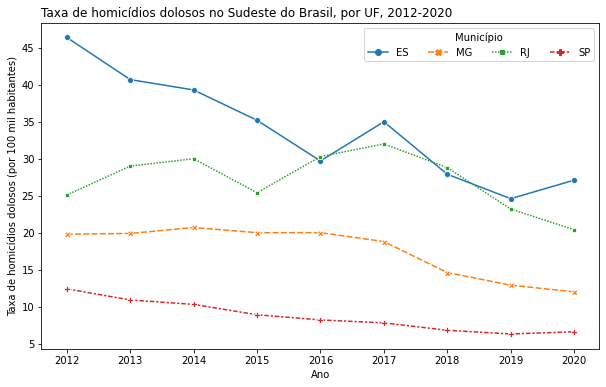

In [9]:
#Visualizando a série temporal:

#Importando as bibliotecas necessárias:

import seaborn as sns 
import matplotlib.pyplot as plt

#Tamanho da figura:

fig, ax = plt.subplots(figsize=(10,6))

#Confecção do gráfico:

ax = sns.lineplot(
    data=hd.query('nome_regiao == "Sudeste"'),
    x = "ano",
    y= "tx_homicidios",
    hue = "sigla_uf",
    markers = True,
    style = 'sigla_uf',
)

# Inserindo o título:

ax.set_title('Taxa de homicídios dolosos no Sudeste do Brasil, por UF, 2012-2020',
  loc = 'left')

# Adicionando rótulo aos eixos:

plt.xlabel("Ano")
plt.ylabel("Taxa de homicídios dolosos (por 100 mil habitantes)")

# Legenda

plt.legend(
    title = 'Município',
    loc= 'upper right',
    ncol = 4 , 
    frameon = True
)

plt.show()

De acordo com o gráfico acima, nota-se que o estado da região sudeste com a maior taxa de homicídios é o ES, que atingiu valor acima de 45 homicídios/100 mil habitantes em 2012. Desde então, essa taxa vem apresentando um decaimento e na medição de 2020, a taxa foi de 27 homicídios/100 mil habitantes.
Em contrapartida, SP é o estado com o menor valor. Em 2012 registrou-se 12,5 mortes/100 mil habitantes e em 2020 esse valor foi de 3 mortes/100 mil habitantes.


**3) Criptomoedas**: 

In [10]:
#Importando o conjunto de dados com os preços das criptomoedas:

criptomoedas = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/criptomoedas/criptomoedas.csv',
    sep = ';',
    decimal = '.'
)

In [15]:
#Observando a estrutura dos dados:

criptomoedas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Criptomoeda          4413 non-null   object 
 1   Iniciais             4413 non-null   object 
 2   Data                 4413 non-null   object 
 3   Abertura             4413 non-null   float64
 4   Fechamento           4413 non-null   float64
 5   Alta                 4413 non-null   float64
 6   Baixa                4413 non-null   float64
 7   Fechamento_ajustado  4413 non-null   float64
 8   Volume               4413 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 310.4+ KB


In [11]:
#Analisando o conjunto de dados:

criptomoedas

,Criptomoeda,Iniciais,Data,Abertura,Fechamento,Alta,Baixa,Fechamento_ajustado,Volume
0,Bitcoin USD,BTC-USD,17/09/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,Bitcoin USD,BTC-USD,18/09/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,Bitcoin USD,BTC-USD,19/09/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,Bitcoin USD,BTC-USD,20/09/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,Bitcoin USD,BTC-USD,21/09/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...,...
4408,Ethereum USD,ETH-USD,24/04/2022,2937.347168,2961.882080,2922.128662,2922.732666,2922.732666,9696829579
4409,Ethereum USD,ETH-USD,25/04/2022,2922.990234,3018.415527,2804.507080,3009.393555,3009.393555,22332690614
4410,Ethereum USD,ETH-USD,26/04/2022,3008.946289,3026.415039,2786.253174,2808.298340,2808.298340,19052045399
4411,Ethereum USD,ETH-USD,27/04/2022,2808.645996,2911.877441,2802.273438,2888.929688,2888.929688,17419284041


In [12]:
#Transformando o formato de data:

criptomoedas['Data'] = pd.to_datetime(criptomoedas.Data, infer_datetime_format = True)

In [13]:
#Analisando as características do conjunto de dados:

criptomoedas.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Criptomoeda          4413 non-null   object        
 1   Iniciais             4413 non-null   object        
 2   Data                 4413 non-null   datetime64[ns]
 3   Abertura             4413 non-null   float64       
 4   Fechamento           4413 non-null   float64       
 5   Alta                 4413 non-null   float64       
 6   Baixa                4413 non-null   float64       
 7   Fechamento_ajustado  4413 non-null   float64       
 8   Volume               4413 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 310.4+ KB


In [14]:
#Visualizando a série temporal:

#Importando as bibliotecas nencessárias:

import plotly.express as px

In [15]:
#Confeccção do gráfico:

px.line(
    data_frame = criptomoedas.query('(Iniciais=="BTC-USD") & (Data<"2017-01-01") & (Data> "2015-01-01")'),
    x = 'Data',
    y=["Baixa", "Alta"],
    title = '<b>Preços mínimos e máximos por dia do bitcoin, 2015-2016.,</b>',
    labels = {
        'Data': 'Dia da Transação',
        'Baixa':'Menor valor do dia (em Dólar)'
    },
    template = "simple_white"
)

In [16]:
px.line(
    data_frame = criptomoedas.query('(Data>"2018-01-01") & (Data < "2022-01-01")'),
    x = 'Data',
    y="Abertura",
    color = "Iniciais",
    title = '<b>Preços de abertura por dia de Criptomoedas</b>',
    labels = {
        'Data': 'Dia da Transação',
        'Baixa':'Menor valor do dia (em log (Dólar))'
    },
    template = "plotly_white",
    log_y = True
)

**4) Educação e Tecnologia:**

In [19]:
#Conjunto de dados:

pnad=pd.read_csv(
    filepath_or_buffer= 'https://raw.githubusercontent.com/jonates/opendata/master/ibge/serie_pnad.csv',
    sep = ';',
    decimal = ','
)

pnad

,UF,Regiao,Ano,Tx_Analfabetismo,Computador_Acesso_Internet_no_Domicilio,Populacao
0,Rondônia,Norte,2003,10.42,6.70,1005438
1,Acre,Norte,2003,19.03,8.24,432567
2,Amazonas,Norte,2003,10.57,5.62,2382407
3,Roraima,Norte,2003,13.70,6.54,292102
4,Pará,Norte,2003,14.48,4.57,4570132
...,...,...,...,...,...,...
319,Rio Grande do Sul,Sul,2015,4.95,46.19,11264688
320,Mato Grosso do Sul,Centro-Oeste,2015,7.45,39.06,2659102
321,Mato Grosso,Centro-Oeste,2015,8.53,32.16,3274089
322,Goiás,Centro-Oeste,2015,7.15,37.74,6630851


In [20]:
#Observando a estrutura dos dados:

pnad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   UF                                       324 non-null    object 
 1   Regiao                                   324 non-null    object 
 2   Ano                                      324 non-null    int64  
 3   Tx_Analfabetismo                         324 non-null    float64
 4   Computador_Acesso_Internet_no_Domicilio  324 non-null    float64
 5   Populacao                                324 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 15.3+ KB


Analisando a Taxa de Analfabetismo:

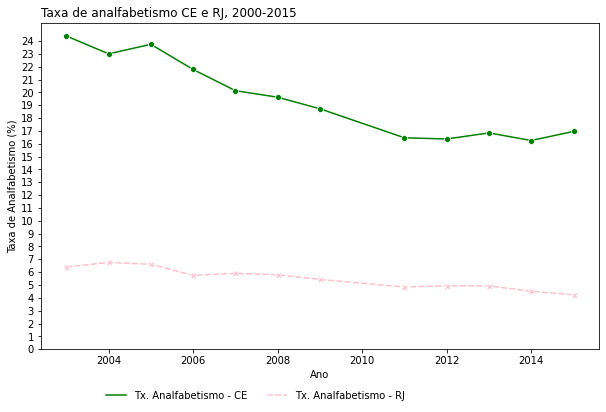

In [21]:
#Tamanho da figura:

fig, ax = plt.subplots(figsize=(10,6))

#Título do gráfico:

ax.set_title('Taxa de analfabetismo CE e RJ, 2000-2015',
  loc = 'left')

#Rótulos:

plt.xlabel("Ano")
plt.ylabel("Taxa de Analfabetismo (%)")

#Gráfico:

ax = sns.lineplot(
    data=pnad.query('(UF=="Ceará")| (UF == "Rio de Janeiro")'),
    x= "Ano",
    y= "Tx_Analfabetismo",
    hue = 'UF',
    markers = True,
    style = "UF",
    palette = ['green', 'pink']
)

#Legendas:

ax.legend(['Tx. Analfabetismo - CE', 'Tx. Analfabetismo - RJ'])

#Localização da legenda:

sns.move_legend(
    ax,
    loc = "upper left",
    bbox_to_anchor=(0.1, -0.1),
    ncol = 2,
    title = None,
    frameon = False,

)
#Ajustando o intervalo de dados do eixo y

plt.yticks(range(0,25))

#Gráfico

plt.show()


Analisando o gráfico acima, nota-se que ambos os conjuntos de dados possuem um comportamento similar. Em 2003, a taxa de analfabetismo no Ceará era de 24,39 % e no RJ era de 6,4%. Desde então, há uma queda e, em 2015, foram registrados os menores valores: 16,96 % (CE) e 4,23 %(RJ). Embora seja o menor valor atingido pelo CE ao longo de 12 anos,  ataxa de analfabetismo neste estado é 4X superior ao estado da região Sudeste, indicando que há muito o que ser feito ainda para que as taxas diminuam no CE.

**Taxa de analfabetismo e computador com acesso à internet nas residências:**

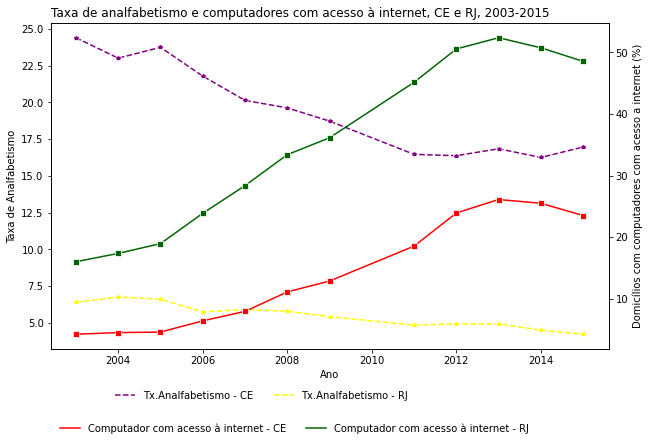

In [23]:
#Tamanho da figura:

fig, ax=plt.subplots(figsize=(10,6))

#Título do gráfico:

ax.set_title('Taxa de analfabetismo e computadores com acesso à internet, CE e RJ, 2003-2015',
  loc = 'left')

#Rótulo dos eixos:

plt.xlabel("Ano")
plt.ylabel("Taxa de Analfabetismo")

#Confeccionando o gráfico:

ax = sns.lineplot(
    data=pnad.query('(UF== "Ceará") | (UF=="Rio de Janeiro")'),
    x="Ano",
    y="Tx_Analfabetismo",
    hue='UF',
    marker ='p',
    linestyle = '--',
    palette = ['purple', 'yellow'],
)

#Alterando legendas das séries
ax.legend(['Tx.Analfabetismo - CE', 'Tx.Analfabetismo - RJ'])

#Alterando a localização da legenda da taxa de analfabetismo

sns.move_legend(
    ax,
    loc = "upper left",
    bbox_to_anchor=(0.1, -0.1),
    ncol=2,
    title = None,
    frameon = False,
)

#Criando o eixo secundário:

ax2 = ax.twinx()

#Série de residências com computadores com acesso à internet: 

ax2 = sns.lineplot(
    data=pnad.query('(UF== "Ceará") | (UF == "Rio de Janeiro")'),
    x = "Ano",
    y = "Computador_Acesso_Internet_no_Domicilio",
    hue = 'UF',
    marker = 's',
    linestyle = '-',
    palette = ['red', 'darkgreen']
)

#Alterando a legenda das séries do eixo secundário 

ax2.legend(['Computador com acesso à internet - CE', 'Computador com acesso à internet - RJ'])

#Alterando a localização da legenda da proporção de computadores com acesso à internet

sns.move_legend(
    ax2,
    loc = "upper left",
    bbox_to_anchor=(0,-0.2),
    ncol = 2,
    title = None,
    frameon = False,
)

#Alterando o título o eixo y secundário:

ax2.set_ylabel('Domicílios com computadores com acesso a internet (%)')

plt.show()

Neste gráfico, foram adicionados os dados de residências com acesso à internet no CE e RJ. Percebe-se que as curvas dos dois estados possuem comportamentos similares, entretanto, em 2015 o CE atingiu aproximadamente 23 % das residências com acesso à internet, e o RJ atingiu quase 50 % dos domicílios. 
Assim, pode-se inferir do gráfico que a taxa de analfabetismo possui relação inversa com domicílios com acesso à internet. Neste caso, uma teoria válida seria o fato de que pessoas alfabetizadas teriam empregos que tivessem melhor remuneração e, assim, poderiam colocar o serviço de internet em suas casas. Felizmente, a taxa de analfabetismo vem diminuindo com os anos e o acesso à internet vem aumentando.
Ademais, a internet hoje é fonte de acesso a notícias e conhecimento e,portanto, é de extrema importância que mais pessoas sejam alcançadas pela internet.

